In [1]:
with open('/code/names.txt') as f:
    words = f.read().splitlines()

print(len(words))
print(min(len(n) for n in words))
print(max(len(n) for n in words))
words[:10]

32033
2
15


['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [2]:
from collections import Counter

bi_gram_counts = Counter()
for w in words:
    characters = ['<S>',  *w, '<E>']
    for c1, c2 in zip(characters, characters[1:]):
        bi_gram_counts.update([(c1, c2)])

In [3]:
list(bi_gram_counts.items())[:10]

[(('<S>', 'e'), 1531),
 (('e', 'm'), 769),
 (('m', 'm'), 168),
 (('m', 'a'), 2590),
 (('a', '<E>'), 6640),
 (('<S>', 'o'), 394),
 (('o', 'l'), 619),
 (('l', 'i'), 2480),
 (('i', 'v'), 269),
 (('v', 'i'), 911)]

In [4]:
# characters = ['<S>', *sorted(list(set(c for w in words for c in w))), '<E>']
characters = ['.', *sorted(list(set(c for w in words for c in w)))]
character_index = {
    c:i
    for i, c in enumerate(characters)
}
character_index

{'.': 0,
 'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26}

In [5]:
index_to_character = {i:c for c, i in character_index.items()}
index_to_character

{0: '.',
 1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z'}

In [6]:
import torch

N = torch.zeros((27, 27), dtype=torch.int32)
for w in words:
    chars = ['.',  *w, '.']
    for c1, c2 in zip(chars, chars[1:]):
        N[character_index[c1], character_index[c2]] += 1

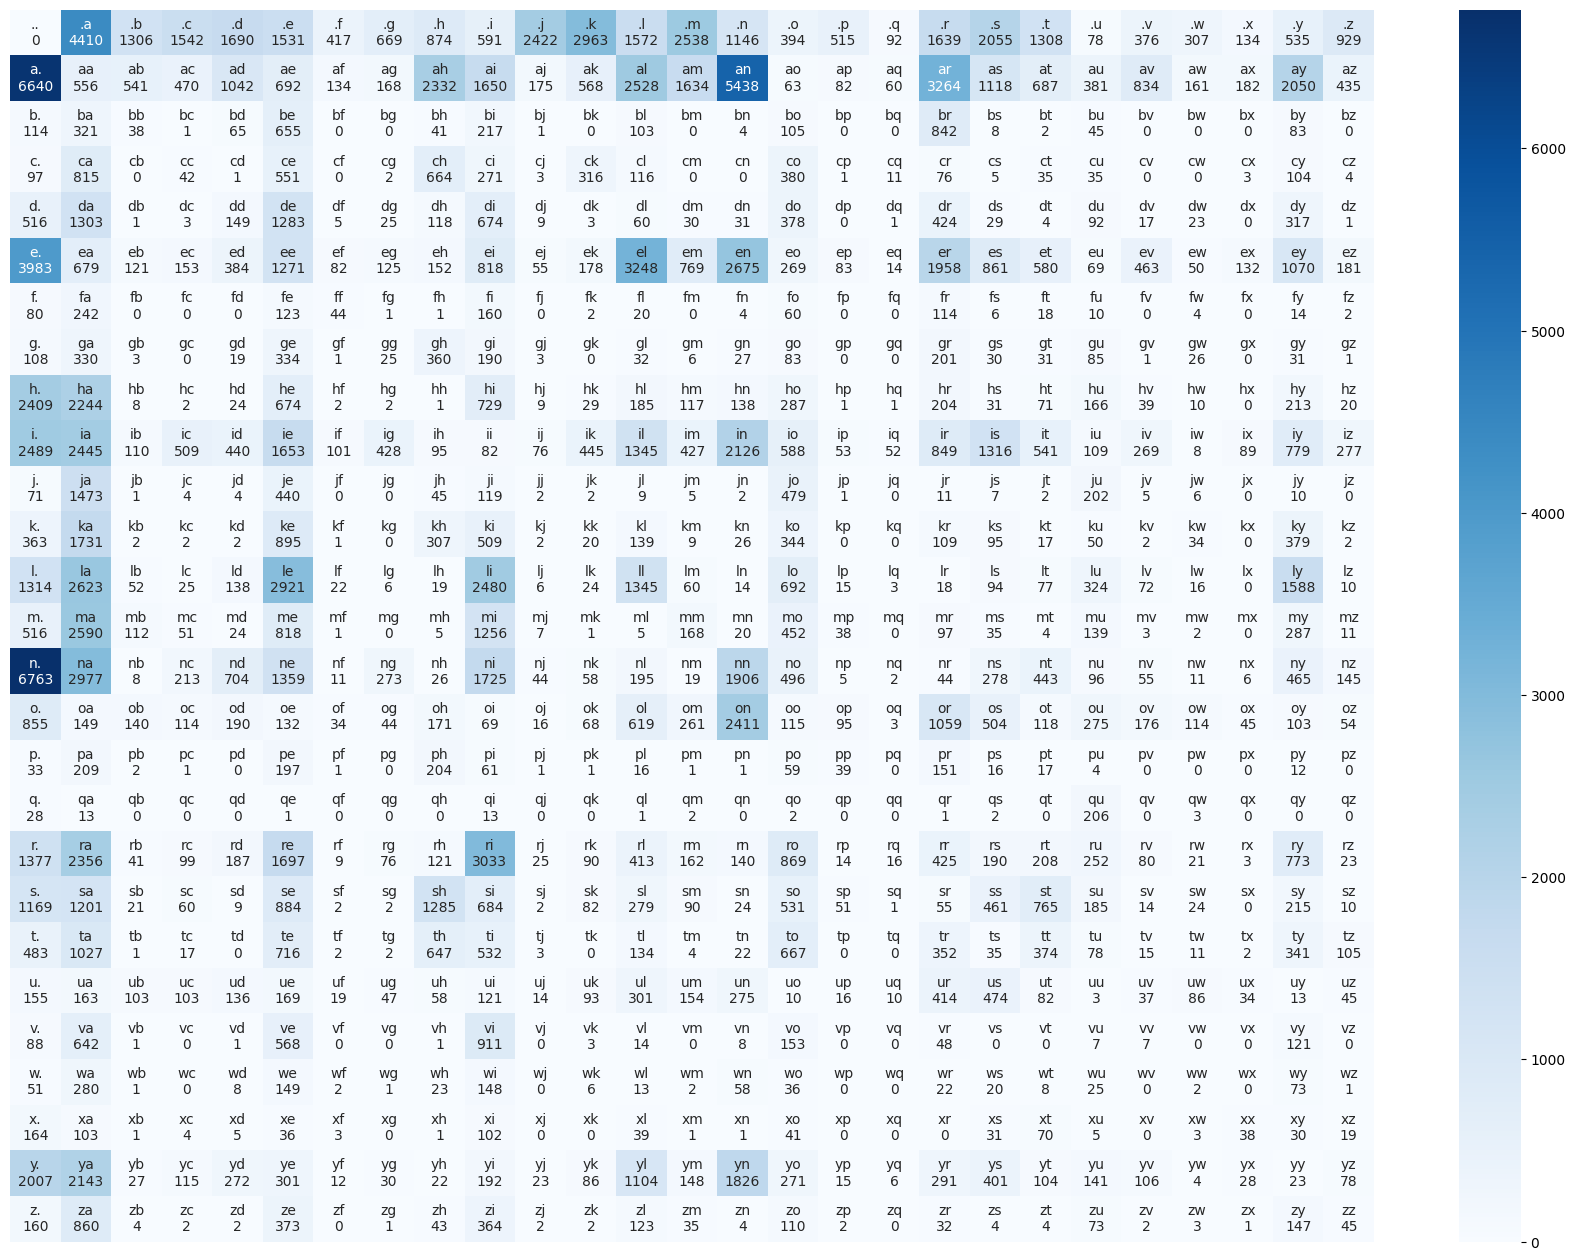

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

custom_annotations = []
for i, c1 in enumerate(characters):
    row = []
    for j, c2 in enumerate(characters):
        row.append(f"{c1}{c2}\n{N[i, j].item()}")
    custom_annotations.append(row)
# custom_annotations[0]

df = pd.DataFrame(N, index=characters, columns=characters)
_, ax = plt.subplots(figsize=(22, 16))
sns.heatmap(df, annot=custom_annotations, fmt='', ax=ax, cmap='Blues')
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.tick_params(axis='both', which='both', length=0)
plt.show()

In [8]:
p = N[0].float()
p /= p.sum()
assert p.sum() == 1
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [9]:
g = torch.Generator().manual_seed(2147483647)
index = torch.multinomial(p, num_samples=1, replacement=True, generator=g)
index

tensor([3])

In [10]:
print(N.sum(dim=0, keepdim=True))
print(N.sum(dim=0, keepdim=False))

tensor([[32033, 33885,  2645,  3532,  5496, 20423,   905,  1927,  7616, 17701,
          2900,  5040, 13958,  6642, 18327,  7934,  1026,   272, 12700,  8106,
          5570,  3135,  2573,   929,   697,  9776,  2398]])
tensor([32033, 33885,  2645,  3532,  5496, 20423,   905,  1927,  7616, 17701,
         2900,  5040, 13958,  6642, 18327,  7934,  1026,   272, 12700,  8106,
         5570,  3135,  2573,   929,   697,  9776,  2398])


In [11]:
print(N.sum(dim=1, keepdim=True))
print(N.sum(dim=1, keepdim=False))

tensor([[32033],
        [33885],
        [ 2645],
        [ 3532],
        [ 5496],
        [20423],
        [  905],
        [ 1927],
        [ 7616],
        [17701],
        [ 2900],
        [ 5040],
        [13958],
        [ 6642],
        [18327],
        [ 7934],
        [ 1026],
        [  272],
        [12700],
        [ 8106],
        [ 5570],
        [ 3135],
        [ 2573],
        [  929],
        [  697],
        [ 9776],
        [ 2398]])
tensor([32033, 33885,  2645,  3532,  5496, 20423,   905,  1927,  7616, 17701,
         2900,  5040, 13958,  6642, 18327,  7934,  1026,   272, 12700,  8106,
         5570,  3135,  2573,   929,   697,  9776,  2398])


In [12]:
# dim 0 is sum of rows
print(N[0].sum())
print(N[1].sum())
print(N.sum(dim=0, keepdim=True))
print(N.sum(dim=0, keepdim=True).shape)  # 1 row by 27 columns
print(N.sum(dim=1, keepdim=True))
print(N.sum(dim=1, keepdim=True).shape)

tensor(32033)
tensor(33885)
tensor([[32033, 33885,  2645,  3532,  5496, 20423,   905,  1927,  7616, 17701,
          2900,  5040, 13958,  6642, 18327,  7934,  1026,   272, 12700,  8106,
          5570,  3135,  2573,   929,   697,  9776,  2398]])
torch.Size([1, 27])
tensor([[32033],
        [33885],
        [ 2645],
        [ 3532],
        [ 5496],
        [20423],
        [  905],
        [ 1927],
        [ 7616],
        [17701],
        [ 2900],
        [ 5040],
        [13958],
        [ 6642],
        [18327],
        [ 7934],
        [ 1026],
        [  272],
        [12700],
        [ 8106],
        [ 5570],
        [ 3135],
        [ 2573],
        [  929],
        [  697],
        [ 9776],
        [ 2398]])
torch.Size([27, 1])


In [13]:
# we want 27 rows representing the count/probability of each character for that row
# meaning, for a given starting character (row), what is the probability of each following
# character (column)
# i.e. this will normalize every row to sum to 1
# we add a count of 1 so that we don't divide by 0 ("model smoothing")
P = (N + 1).float()
P /= P.sum(dim=1, keepdim=True)
assert (P.sum(dim=1).round(decimals=4) == 1).all().item()

In [14]:
g = torch.Generator().manual_seed(2147483647)

In [15]:
# g = torch.Generator().manual_seed(2147483647)
for _ in range(30):
    index = 0  # first row corresponds to the counts/occurances of first letters
    while True:
        # p = torch.ones(27) / 27  # uniform distribution; i.e. untrained "model"
        # p = N[index].float()
        # p /= p.sum()
        p = P[index]
        # next index/letter
        index = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        if index == 0:  # end character
            break
        print(index_to_character[index], end='')
    print()


cexze
momasurailezitynn
konimittain
llayn
ka
da
staiyaubrtthrigotai
moliellavo
ke
teda
ka
emimmsade
enkaviyny
ftlspihinivenvorhlasu
dsor
br
jol
pen
aisan
ja
feniee
zem
deru
firit
gaikajahahbevare
kiysthelenaririenah
keen
x
al
kal


In [16]:
print(f"Anything above {1 / (len(characters)):.4f} is more likely than random; and that we've learned something useful.")

    
# how can we summarize these probabilities into a single number that represents the quality of this
# model?
# likelihood is the product of all of these probabilities
# it is telling us about the probability of the entire dataset assigned by the model that we've
# trained, which is a measure of quality of the model

log_likelihood = 0
n = 0
for w in words[0:10]:
    chars = ['.',  *w, '.']
    for c1, c2 in zip(chars, chars[1:]):
        # print(f"{character_index[c1]} - {character_index[c2]}")
        prob = P[character_index[c1], character_index[c2]]
        # because the product of the probabilities is going to be a very small number, we can take the
        # log of the product, which will turn it into a sum
        # this is called the log likelihood
        log_prob = torch.log(prob)
        log_likelihood += log_prob
        n += 1
        print(f"{c1}{c2}:  prob={prob:.4f} | log prob={log_prob:.4f}")
print(f"log likelihood: {log_likelihood:.4f}")
# we want a loss function so that we can minimize (the closer to 0 the better the model)
print(f"negative log likelihood: {-log_likelihood:.4f}")
# we also want the average loss, so that we can compare data of different sizes
print(f"average negative log likelihood: {-log_likelihood / n:.4f}")


Anything above 0.0370 is more likely than random; and that we've learned something useful.
.e:  prob=0.0478 | log prob=-3.0410
em:  prob=0.0377 | log prob=-3.2793
mm:  prob=0.0253 | log prob=-3.6753
ma:  prob=0.3885 | log prob=-0.9454
a.:  prob=0.1958 | log prob=-1.6305
.o:  prob=0.0123 | log prob=-4.3965
ol:  prob=0.0779 | log prob=-2.5526
li:  prob=0.1774 | log prob=-1.7293
iv:  prob=0.0152 | log prob=-4.1845
vi:  prob=0.3508 | log prob=-1.0476
ia:  prob=0.1380 | log prob=-1.9807
a.:  prob=0.1958 | log prob=-1.6305
.a:  prob=0.1376 | log prob=-1.9835
av:  prob=0.0246 | log prob=-3.7041
va:  prob=0.2473 | log prob=-1.3971
a.:  prob=0.1958 | log prob=-1.6305
.i:  prob=0.0185 | log prob=-3.9919
is:  prob=0.0743 | log prob=-2.5998
sa:  prob=0.1478 | log prob=-1.9119
ab:  prob=0.0160 | log prob=-4.1363
be:  prob=0.2455 | log prob=-1.4044
el:  prob=0.1589 | log prob=-1.8396
ll:  prob=0.0962 | log prob=-2.3408
la:  prob=0.1876 | log prob=-1.6733
a.:  prob=0.1958 | log prob=-1.6305
.s:  prob

---

# Equivalent Nueral Network

- bigram character language model
- receives a single character as input; output is the probability distribution of the next character in the sequence
- using gradient descent 

In [17]:
# create the training set of all of the bigrams

# x is the input, y is the target (i.e. the next character)
x, y = [], []

training_data = []
for w in words:
    chars = ['.',  *w, '.']
    for c1, c2 in zip(chars, chars[1:]):
        x.append(character_index[c1])
        y.append(character_index[c2])
        
# list(zip(x[:10], y[:10]))
x = torch.tensor(x)
y = torch.tensor(y)

print(x)
print(y)

tensor([ 0,  5, 13,  ..., 25, 26, 24])
tensor([ 5, 13, 13,  ..., 26, 24,  0])


In [18]:
x

tensor([ 0,  5, 13,  ..., 25, 26, 24])

In [19]:
len(characters)

27

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0

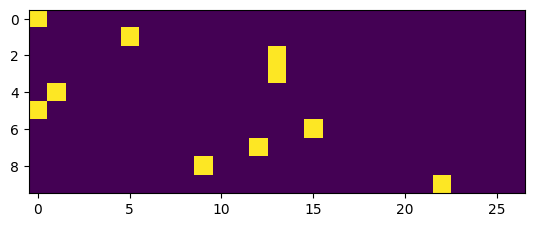

In [20]:
import torch.nn.functional as F

x_encoded = F.one_hot(x, num_classes=len(characters)).float()
print(x_encoded[0:10])
plt.imshow(x_encoded[0:10])

In [21]:
# weights for one nueron
W = torch.randn((len(characters), 1), requires_grad=True)
W

tensor([[ 0.4831],
        [ 0.3878],
        [ 1.6848],
        [ 0.9916],
        [ 0.6359],
        [ 0.7341],
        [ 0.4810],
        [-0.0173],
        [ 0.5550],
        [ 2.2611],
        [ 1.7778],
        [-0.4658],
        [ 0.7909],
        [ 0.6413],
        [-2.2212],
        [ 0.3308],
        [ 1.7403],
        [-1.6524],
        [ 0.5493],
        [-0.5356],
        [-1.0106],
        [ 0.2324],
        [-1.9942],
        [-1.3471],
        [ 1.7218],
        [ 0.8642],
        [ 0.5319]], requires_grad=True)

In [22]:
tuple(x_encoded.shape)

(228146, 27)

In [23]:
print(f"{tuple(x_encoded.shape)} x {tuple(W.shape)} = {tuple((x_encoded @ W).shape)}")

(228146, 27) x (27, 1) = (228146, 1)


In [24]:
x_encoded @ W

tensor([[0.4831],
        [0.7341],
        [0.6413],
        ...,
        [0.8642],
        [0.5319],
        [1.7218]], grad_fn=<MmBackward0>)

In [25]:
x_encoded[0].dot(W.reshape((1, 27))[0])

tensor(0.4831, grad_fn=<DotBackward0>)

In [45]:
from micrograd.micrograd.nn import Neuron

n = Neuron(nin=27, nonlin=False)
print(n.w)
# forward pass
print(n(x_encoded[0]))
print(n(x_encoded[1]))


[Value(data=0.32311112254664076, grad=0), Value(data=0.3042942525003156, grad=0), Value(data=0.5510129442492977, grad=0), Value(data=-0.21346849164676107, grad=0), Value(data=-0.04434227194124585, grad=0), Value(data=0.041565049188012404, grad=0), Value(data=-0.7985015666689108, grad=0), Value(data=0.7808655012970982, grad=0), Value(data=-0.16680163937024584, grad=0), Value(data=0.5100429714195882, grad=0), Value(data=-0.33467974737815953, grad=0), Value(data=0.5445373674294396, grad=0), Value(data=-0.04749504436144347, grad=0), Value(data=-0.9280067823838973, grad=0), Value(data=0.99391512619122, grad=0), Value(data=0.2423023849460555, grad=0), Value(data=0.7151891516826852, grad=0), Value(data=-0.8113536074883763, grad=0), Value(data=0.4271048327462523, grad=0), Value(data=-0.4492594193739219, grad=0), Value(data=-0.579585546946326, grad=0), Value(data=-0.7679832983254762, grad=0), Value(data=0.0035374966314325462, grad=0), Value(data=0.6552756153372616, grad=0), Value(data=-0.614609

In [43]:
n

LinearNeuron(27)

---

In [58]:
# weights for 27 nuerons (because we have 27 outputs) with each neuron having 27 weights
# notice that this is similar to the 27x27 bigram count matrix we created above
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((len(characters), len(characters)), requires_grad=True, generator=g)
W.shape

torch.Size([27, 27])

In [48]:
# shows us the activation rate for every one of the 228K characters for each of the 27 neurons
print(f"{tuple(x_encoded.shape)} x {tuple(W.shape)} = {tuple((x_encoded @ W).shape)}")

(228146, 27) x (27, 27) = (228146, 27)


In [51]:
# is the firing rate of the 14th neuron for the 4th example
(x_encoded @ W)[3, 13]

tensor(-1.7983, grad_fn=<SelectBackward0>)

In [52]:
(x_encoded[3] * W[:, 13]).sum()

tensor(-1.7983, grad_fn=<SumBackward0>)

In [67]:
# forward pass
# everything here is differentiable, making backpropagation possible
x_encoded = F.one_hot(x, num_classes=len(characters)).float()
logits = x_encoded @ W  # log-counts
# next two lines are "softmax activation" i.e. outputs probabilities distribution
counts = logits.exp()  # counts; equivalent to N above
probabilities = counts / counts.sum(dim=1, keepdim=True)  # equivalent to P above
assert (probabilities.sum(dim=1).round(decimals=4) == 1).all().item()
# for every example (row), we have a probability distribution of the next character (column)
print(probabilities.shape)

# what is the probability of the correct character for each example?
actual_probabilities = probabilities[range(len(y)), y]
print(actual_probabilities.shape)
actual_probabilities


torch.Size([228146, 27])
torch.Size([228146])


tensor([0.0123, 0.0181, 0.0267,  ..., 0.0111, 0.0833, 0.0308],
       grad_fn=<IndexBackward0>)

In [65]:
# gets the actual probability of the correct character for each example for the first example
# e.g. `.` -> `e`
probabilities[0, y[0]].item()

# so the model assigned a low probability to this example (i.e. the network thinks it is unlikely),
# even though it was the correct character

0.012286253273487091

In [73]:
log_likelihood = actual_probabilities.log().mean()
log_likelihood

tensor(-3.7590, grad_fn=<MeanBackward0>)